In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
from hypernetx import Hypergraph
import igraph as ig
import operator
import hypernetx.algorithms.hypergraph_modularity as hmod
import itertools
import random

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1= pd.read_csv("/content/df_top10.csv") #df originale
df = df1[df1['CPC Classifications'].apply(lambda x: isinstance(x, str))]
#df[['Unnamed: 0', 'CPC Classifications']]


/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/c_parser_wrapper.py:373: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common_type = np.find_common_type(
<ipython-input-2-37f26eb5d573>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df1= pd.read_csv("/content/df_top10.csv") #df originale


In [ ]:
patent_cpc = {}

for index, row in df.iterrows():
        patent_key = row['Unnamed: 0']
        cpc = row['CPC Classifications'].split(';;')
        patent_cpc[patent_key] = cpc

diz = {}
for key, values in patent_cpc.items():
        new_values = [value[:4] for value in values]
        diz[key] = new_values

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [ ]:
#diz


In [ ]:
input_data = {}
for idx, values in enumerate(diz.values()):
    input_data[idx] = tuple(set(values))

input_data

{0: ('H05B', 'B23P', 'B23K', 'F01D'),
 1: ('C08G', 'C07D', 'C07C'),
 2: ('F02C', 'F23R'),
 3: ('F02C', 'F05D'),
 4: ('F04D',),
 5: ('F04B', 'F04D', 'F02C', 'F05D', 'F01D'),
 6: ('B60L', 'H02J', 'Y02T'),
 7: ('C23C', 'F01D', 'F05D', 'B05B'),
 8: ('B22D', 'B22C', 'Y10T'),
 9: ('B60L', 'B60K', 'F02N', 'B60W', 'F02D', 'Y02T'),
 10: ('F01D', 'Y10T', 'C23C'),
 11: ('F23R', 'F23C', 'F23D'),
 12: ('F04D', 'F01D'),
 13: ('H02K', 'F05D', 'B64D', 'B64C'),
 14: ('G01R',),
 15: ('F02M', 'F23R'),
 16: ('F01D', 'Y10T', 'Y02T', 'C23C'),
 17: ('H02M', 'B60Y', 'Y10T', 'B60L', 'Y10S', 'B60W', 'H02J', 'Y02T'),
 18: ('G01N', 'G01F'),
 19: ('F02C', 'A63B', 'Y02T', 'F05D', 'F01D'),
 20: ('F02C', 'F05D', 'F02K', 'F01D'),
 21: ('B61L', 'H04L', 'B61C', 'Y02T', 'H04B', 'H04W'),
 22: ('C23C', 'Y02T', 'F05D', 'B23P', 'F01D'),
 23: ('F05D', 'F01D'),
 24: ('G01N', 'G01D'),
 25: ('Y10T', 'F01D', 'F05D', 'C23C'),
 26: ('C08G',),
 27: ('Y10S', 'H10K', 'C09K', 'H05B'),
 28: ('G01M', 'F02D', 'F01D'),
 29: ('F05D', 'F01D'

In [ ]:
#plotting
brevetti_top5 = sorted(input_data.items(), key=lambda x: len(set(x)), reverse=True)[:5]
cpc_plot=[]
for brevetto in brevetti_top5:
  cpc_plot.append(brevetto[1])

cpc_plot

[('H05B', 'B23P', 'B23K', 'F01D'),
 ('C08G', 'C07D', 'C07C'),
 ('F02C', 'F23R'),
 ('F02C', 'F05D'),
 ('F04D',)]

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(typ

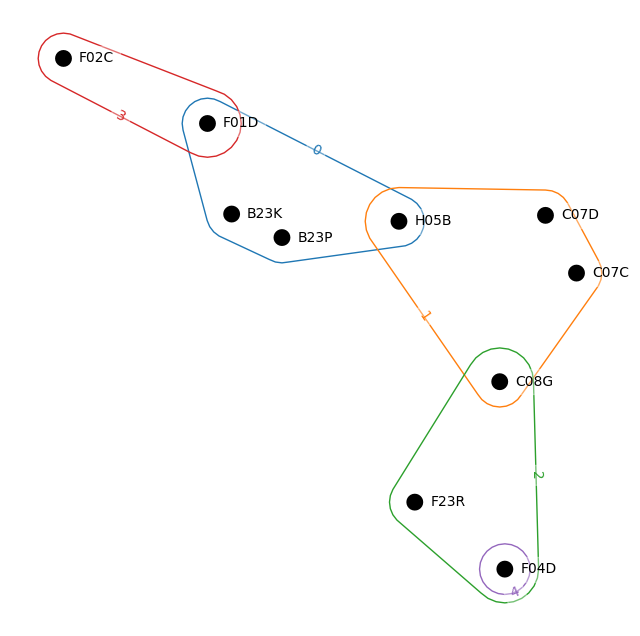

In [ ]:
cpc = [('H05B', 'B23P', 'B23K', 'F01D'),
 ('C08G', 'C07D', 'C07C','H05B'),
 ('F04D', 'F23R','C08G'),
 ('F02C', 'F01D'),
 ('F04D')]
HG = hnx.Hypergraph(cpc,static=True)
hnx.draw(HG)


In [ ]:
H = hnx.Hypergraph(input_data)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


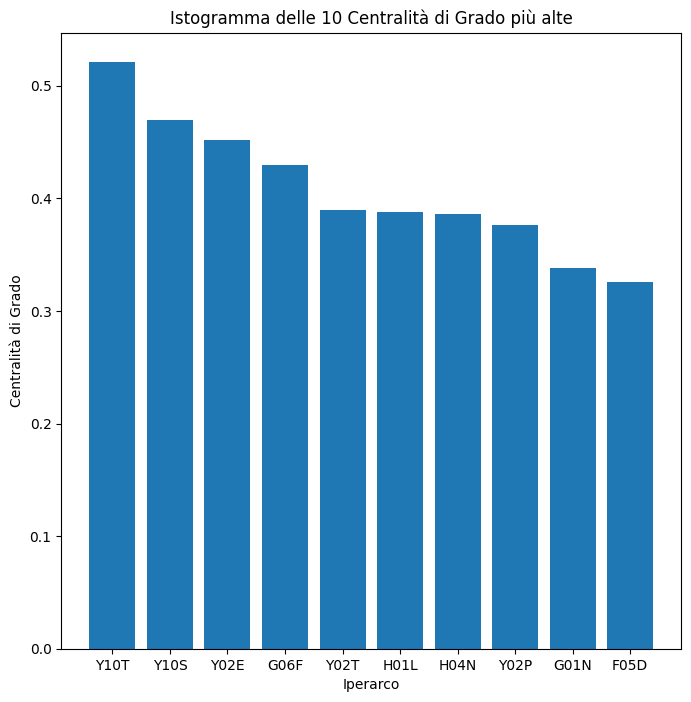

In [ ]:
centralities = []

for node in H.nodes():
    hyperedge_degree_centrality = len(list(H[node])) / len(list(H.nodes()))
    centralities.append((node, hyperedge_degree_centrality))

sorted_centralities = sorted(centralities, key=lambda x: x[1], reverse=True)

top_10 = sorted_centralities[:10]

labels, values = zip(*top_10)

#plot
plt.bar(labels, values)
plt.xlabel('Iperarco')
plt.ylabel('Centralità di Grado')
plt.title('Istogramma delle 10 Centralità di Grado più alte')
plt.show()

In [ ]:
#data l'alta dimensionalità del ipergrafo, i modelli non runnano, è stato necessario ridimensionarlo

In [ ]:
cpc_da_mantenere = set(['Y10T'])

# Filtra i brevetti mantenendo solo quelli che contengono almeno uno dei CPC specificati
brevetti_filtrati = {numero_brevetto: cpc for numero_brevetto, cpc in input_data.items() if any(c in cpc_da_mantenere for c in cpc)}

len(brevetti_filtrati), len(input_data)

(13030, 296639)

In [ ]:
H_cluster = hnx.Hypergraph(brevetti_filtrati)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [ ]:
def generate_random_set_partitions(elements):
    random_sets = []

    while elements:
        num_elements = random.randint(1, len(elements))
        selected_elements = set(random.sample(elements, k=num_elements))
        random_sets.append(selected_elements)
        elements = [e for e in elements if e not in selected_elements]
    return random_sets

# Esempio di utilizzo

random_set_partitions = generate_random_set_partitions(list(H_cluster.nodes()))



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install hypernetx==0.5.2
!pip install python-igraph==0.9.1


ERROR: Could not find a version that satisfies the requirement hypernetx==0.5.2 (from versions: 0.1.9, 0.2.4, 0.2.5, 0.2.6, 0.2.7, 0.3.0, 0.3.1, 0.3.2, 0.3.4, 0.3.5, 0.3.6, 0.3.7, 1.0, 1.0.2, 1.0.3, 1.0.4, 1.1.1, 1.1.2, 1.1.3, 1.2, 1.2.2, 1.2.3, 1.2.4, 1.2.5, 2.0.0.post1, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.0.5, 2.1.0, 2.1.1, 2.1.2)
ERROR: No matching distribution found for hypernetx==0.5.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-igraph: filename=python_igraph-0.9.1-cp310-cp310-linux_x86_64.whl size=2473949 sha256=19f36136f273b7b23811d03117ab1ae16d0a6a8a5e074b948fda10cde23330f4
  Stored in directory: /root/.cache/pip/wheels/54/73/a7/59e312eb24aecb6be8c128b8c6b0bb474758a1be4c4f939ac6
Successfully built python-igraph
  Attempting uninstall: python-igraph
    Found existing installation: python-igraph 0.11.3
    Uninstalling python-igraph-0.11.3:
      Successfully uninstalled python-igrap

In [ ]:
strict = hmod.strict
majority = hmod.majority

print('linear edge contribution:')
print('qH(Random Partition):',hmod.modularity(H_cluster,random_set_partitions))

print('strict edge contribution:')
print('qH(Random Partition):',hmod.modularity(H_cluster,random_set_partitions,strict))

print('majority edge contribution:')
print('qH(Random Partition):',hmod.modularity(H_cluster,random_set_partitions,majority))

linear edge contribution:
qH(Random Partition): 0.005917547091137013
strict edge contribution:
qH(Random Partition): 0.0019158474276407683
majority edge contribution:
qH(Random Partition): 0.0031954431959119725


In [ ]:
K = hmod.kumar(H_cluster)


In [ ]:
print('qH =',hmod.modularity(H_cluster, K, hmod.strict))


qH = 0.18971133275322208


In [ ]:
print('edges with all vertices in same part:',
      sum([len(set([hmod.part2dict(K)[v] for v in H_cluster.edges[e]]))==1 for e in H_cluster.edges()]))

edges with all vertices in same part: 4367


In [ ]:
## Compute qH
print('qH =',hmod.modularity(H_cluster, K))

## number of edges where all vertices belong to the same community
print('edges with all vertices in same part:',
      sum([len(set([hmod.part2dict(K)[v] for v in H_cluster.edges[e]]))==1 for e in H_cluster.edges()]))

qH = 0.2875910295847222
edges with all vertices in same part: 4367


In [ ]:
print('qH =',hmod.modularity(H_cluster, K, hmod.majority))


qH = 0.3120753744061299


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('start from:',random_set_partitions)
A = hmod.last_step(H_cluster,random_set_partitions)
print('final partition:',A)


start from: [{'F16K', 'E01F', 'C01G', 'F27B', 'C10G', 'B01L', 'H04R', 'G11C', 'B05C', 'B60L', 'C09D', 'H04Q', 'H04W', 'F16J', 'G01L', 'D21H', 'B23Q', 'G03G', 'F25J', 'B23H', 'D04H', 'C12N', 'B60P', 'F02M', 'G09F', 'G21K', 'F25B', 'A61M', 'Y02D', 'H01H', 'C07C', 'B21D', 'F17C', 'F04B', 'G07C', 'F04C', 'F15D', 'A61L', 'F02C', 'C21D', 'B64C', 'B25H', 'H03H', 'E06B', 'C11D', 'A61F', 'G01N', 'A01K', 'H04N', 'F16C', 'F04D', 'E02B', 'G03C', 'Y10S', 'H03K', 'B29L', 'G06K', 'F16H', 'B65H', 'A62D', 'B65G', 'Y02A', 'F01D', 'F23R', 'B05B', 'B41M', 'B44C', 'F01K', 'H02K', 'B60W', 'F23C', 'F01C', 'B21J', 'F23D', 'F16N', 'C25B', 'A41D', 'B82Y', 'F24F', 'F16B', 'B24B', 'B08B', 'B81B', 'B01F', 'F25C', 'B63B', 'B23C', 'H03M', 'H01G', 'F23M', 'B28B', 'H01C', 'H10K', 'B21B', 'G01V', 'C09K', 'F23J', 'G01P', 'F03D', 'B41C', 'Y02P', 'E05C', 'F01L', 'G02B', 'B27B', 'F28D', 'C02F', 'H05K', 'G05D', 'C22B', 'C10M', 'C07D', 'E05Y', 'C09C', 'D10B', 'G11B', 'C12P', 'G03B', 'F16F', 'C04B', 'B23D', 'G05B', 'B21C', 'B

In [ ]:
len(random_set_partitions), len(A)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5, 5)

In [ ]:
t = list(range(2000,2021))
for anno in t:
    dataset_corrente = df[anno]

    # Esegui il codice su ogni dataset
    patent_inventor_dict = {}

    for index, row in dataset_corrente.iterrows():
        patent_key = row['Unnamed: 0']
        inventors = row['CPC Classifications'].split(';;')
        patent_inventor_dict[patent_key] = inventors

    new_dict = {}
    for key, values in patent_inventor_dict.items():
        new_values = [value[0] for value in values]
        new_dict[key] = new_values

    collaborazioni = {}

    # Itera su ogni brevetto e inventore nel dizionario
    for index, (patent_key, inventors) in enumerate(new_dict.items()):
        collaborazioni[index] = tuple(inventors)

    H_t = hnx.Hypergraph(collaborazioni)

    # Calcola cpc_degree_dict
    cpc_degree_dict = {}
    for cpc in H_t.nodes:
        degree = H_t.degree(cpc, s=1)
        cpc_degree_dict[cpc] = degree

    # Ordina cpc_degree_dict in ordine alfabetico
    cpc_degree = {k: v for k, v in sorted(cpc_degree_dict.items())}

    # Stampa il risultato
    print(f"Anno {anno}:")
    print(cpc_degree)
    print()


Anno 2000.0:
{'A': 16, 'B': 260, 'C': 164, 'D': 5, 'E': 5, 'F': 78, 'G': 195, 'H': 197, 'Y': 163}

Anno 2001.0:
{'A': 26, 'B': 248, 'C': 290, 'D': 3, 'E': 3, 'F': 175, 'G': 194, 'H': 222, 'Y': 255}

Anno 2002.0:
{'A': 9, 'B': 307, 'C': 275, 'D': 10, 'E': 2, 'F': 165, 'G': 207, 'H': 327, 'Y': 310}

Anno 2003.0:
{'A': 12, 'B': 288, 'C': 360, 'D': 12, 'E': 1, 'F': 160, 'G': 211, 'H': 343, 'Y': 370}

Anno 2004.0:
{'A': 18, 'B': 276, 'C': 357, 'D': 11, 'E': 5, 'F': 190, 'G': 220, 'H': 297, 'Y': 330}

Anno 2005.0:
{'A': 29, 'B': 298, 'C': 451, 'D': 13, 'E': 5, 'F': 214, 'G': 206, 'H': 308, 'Y': 381}

Anno 2006.0:
{'A': 34, 'B': 307, 'C': 378, 'D': 5, 'E': 7, 'F': 267, 'G': 215, 'H': 314, 'Y': 419}

Anno 2007.0:
{'A': 47, 'B': 275, 'C': 415, 'D': 3, 'E': 2, 'F': 363, 'G': 257, 'H': 299, 'Y': 444}

Anno 2008.0:
{'A': 59, 'B': 385, 'C': 441, 'D': 3, 'E': 2, 'F': 493, 'G': 285, 'H': 398, 'Y': 548}

Anno 2009.0:
{'A': 48, 'B': 289, 'C': 297, 'D': 5, 'E': 2, 'F': 365, 'G': 232, 'H': 369, 'Y': 390}

In [ ]:
import pandas as pd

data = []

for anno in t:
    dataset_corrente = G[anno]
    patent_inventor_dict = {}

    for index, row in dataset_corrente.iterrows():
        patent_key = row['Unnamed: 0']
        inventors = row['CPC Classifications'].split(';;')
        patent_inventor_dict[patent_key] = inventors

    new_dict = {}
    for key, values in patent_inventor_dict.items():
        new_values = [value[0] for value in values]
        new_dict[key] = new_values

    collaborazioni = {}
    for index, (patent_key, inventors) in enumerate(new_dict.items()):
        collaborazioni[index] = tuple(inventors)

    H = hnx.Hypergraph(collaborazioni)

    cpc_degree_dict = {}
    for cpc in H.nodes:
        degree = H.degree(cpc, s=1)
        cpc_degree_dict[cpc] = degree

    sorted_cpc_degree_dict = dict(sorted(cpc_degree_dict.items()))

    data.append({'Anno': anno, **sorted_cpc_degree_dict})

df = pd.DataFrame(data)
print(df)


      Anno   A    B    C     D   E     F    G    H    Y
0   2000.0  16  260  164   5.0   5    78  195  197  163
1   2001.0  26  248  290   3.0   3   175  194  222  255
2   2002.0   9  307  275  10.0   2   165  207  327  310
3   2003.0  12  288  360  12.0   1   160  211  343  370
4   2004.0  18  276  357  11.0   5   190  220  297  330
5   2005.0  29  298  451  13.0   5   214  206  308  381
6   2006.0  34  307  378   5.0   7   267  215  314  419
7   2007.0  47  275  415   3.0   2   363  257  299  444
8   2008.0  59  385  441   3.0   2   493  285  398  548
9   2009.0  48  289  297   5.0   2   365  232  369  390
10  2010.0  45  333  335   5.0   4   625  274  384  545
11  2011.0  45  340  373   1.0   3   585  289  438  531
12  2012.0  48  406  292   1.0   9   761  348  357  565
13  2013.0  55  484  376   4.0  16  1083  391  478  668
14  2014.0  61  445  322   5.0   7  1022  407  513  718
15  2015.0  57  596  472   8.0  29  1013  350  487  832
16  2016.0  39  507  360  11.0  23   905  378  4

          A     B     C   D   E     F     G     H     Y
Anno                                                   
2000.0   78  1015   487  23  30   358  2177  2459   966
2001.0  111  1049   793  30  19   584  2328  2970  1303
2002.0   78  1311   825  42  37   605  2731  3646  1572
2003.0   77  1220  1008  41  19   655  2977  3912  1618
2004.0  144  1133   979  42  81   711  3250  4107  1647
2005.0  225  1176  1232  38  84   762  3247  4350  1739
2006.0  252  1221  1002  40  99   904  3459  4767  1794
2007.0  248   975  1065  21  45  1007  3250  4747  1691
2008.0  233  1167  1063  32  18  1185  3745  5237  1908
2009.0  207   954   762  29  22   906  2830  4402  1363
2010.0  246  1043   837  20  21  1431  2891  4514  1712
2011.0  226  1120   962   5  30  1372  2979  5266  1799
2012.0  224  1269   779   7  48  1817  3564  5985  1998
2013.0  278  1527  1037  21  62  2493  4384  7820  2414
2014.0  317  1434   952  19  34  2406  4428  8209  2468
2015.0  299  1654  1257  23  83  2379  4228  891

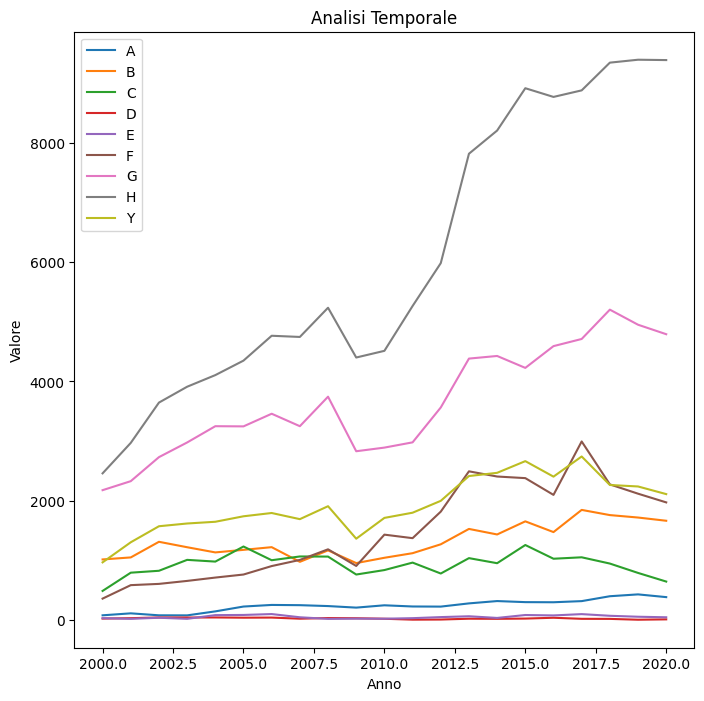

In [ ]:
df.set_index('Anno', inplace=True)

df.plot(legend=True)
plt.xlabel('Anno')
plt.ylabel('Valore')
plt.title('Analisi Temporale')
plt.show()

